In [3]:
from typing import List, Optional
import pandas as pd; pd.set_option('display.max_columns', 100)
from pandas.core.common import flatten
import numpy as np
import shap
from datetime import datetime

from tqdm.notebook import tqdm

import re
import os

from functools import partial
from scipy.stats import mode
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
# import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, cohen_kappa_score, log_loss, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibrationDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.manifold import TSNE
# import optuna
import catboost as cb
import xgboost as xgb

from View import MyClass
mc = MyClass()

import warnings
warnings.filterwarnings('ignore')

In [82]:
train_oof = pd.read_csv('data/train_oof.csv')
test_oof = pd.read_csv('data/test_oof.csv')
sub = pd.read_csv('data/sample_submission.csv')

train_oof = train_oof.drop('Unnamed: 0', axis=1)
test_oof = test_oof.drop('Unnamed: 0', axis=1)

In [83]:
param_lr = {
    'max_iter': 1000000
}
std_slc = StandardScaler()
linear = LogisticRegression(**param_lr)
pipe = Pipeline(steps=[('std_scl', std_slc),
                           ('linear', linear)])

In [76]:
# train_oof = train_oof.drop(['maximum open credit', 'current loan amount', 'annual income',
#        'term_freq', 'credit score'], axis=1)
# test_oof = test_oof.drop(['maximum open credit', 'current loan amount', 'annual income',
#        'term_freq', 'credit score'], axis=1)

In [84]:
# train_oof.columns

In [ ]:
model_rf, dict_fold_rf=  mc.fit_kfold(train_oof, target='target', model=RandomForestClassifier ,name_model="forest",params=False, trh_flag=True, threshold=0.4, fold=10, eval_set=False, pipeline=False)

In [78]:
model_oof, dict_fold_oof=  mc.fit_kfold(train_oof, target='target', model=pipe ,name_model="pipe_lr",params=False, trh_flag=True, threshold=0.1, fold=10, eval_set=False, pipeline=True)

Fold 0 ==> pipe_lr model ROC-AUC score is ==> 0.9595353867527192
Fold 1 ==> pipe_lr model ROC-AUC score is ==> 0.9683106331718383
Fold 2 ==> pipe_lr model ROC-AUC score is ==> 0.9589990239956389
Fold 3 ==> pipe_lr model ROC-AUC score is ==> 0.954022281036499
Fold 4 ==> pipe_lr model ROC-AUC score is ==> 0.9563084173781533
Fold 5 ==> pipe_lr model ROC-AUC score is ==> 0.9627095991347854
Fold 6 ==> pipe_lr model ROC-AUC score is ==> 0.9509887539677655
Fold 7 ==> pipe_lr model ROC-AUC score is ==> 0.9683751841200814
Fold 8 ==> pipe_lr model ROC-AUC score is ==> 0.956144350143789
Fold 9 ==> pipe_lr model ROC-AUC score is ==> 0.7098881251315143
Средняя совокупность оценок ROC-AUC за 10-кратный период составляет 0.9345281754832786


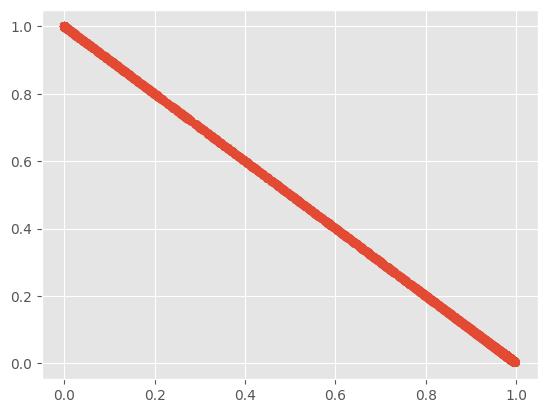

In [81]:
# y = np.sin(pred)
pred = model_oof.predict_proba(test_oof)
plt.scatter(pred[:,0], pred[:,1])

In [70]:
# pred = model_oof.predict(test_oof)
pred = model_oof.predict_proba(test_oof)[:,1]
pred = np.where(pred > 0.1, 1, 0)
sub['Credit Default'] = pred
sub.to_csv(f'submission/sample_submission_oof.csv', index=False)